In [34]:
import os
import pandas as pd

base_dir = "../../Data"
base_csv_path = os.path.join(base_dir, 'm4_post_feat_sel.csv')
assert os.path.exists(base_csv_path), f"base {base_csv_path} does not exist"

df = pd.read_csv(base_csv_path)

In [35]:
#Print number of missing values in wl_tme
print(f'Number of missing values in wl_time: {df["wl_time"].isnull().sum()}')

#Print number of values in wl_time
print(f'Number of values in wl_time: {df["wl_time"].count()}')

wl_median = df['wl_time'].median()

#Print median for wl_time
print(f'Median for wl_time: {wl_median}')

#Code wl_time to 0 if wl_time is is less than the median else 1
df['wl_time'] = df['wl_time'].apply(lambda x: 0 if x < wl_median else 1)

#Print percentage of 0 and 1 in wl_time
print(f'Percentage of 0 and 1 in wl_time: \n{df["wl_time"].value_counts(normalize=True) * 100}')

#Print number of missing values in wl_time
print(f'Number of missing values in wl_time: {df["wl_time"].isnull().sum()}')

Number of missing values in wl_time: 0
Number of values in wl_time: 77410
Median for wl_time: 78.0
Percentage of 0 and 1 in wl_time: 
1    50.188606
0    49.811394
Name: wl_time, dtype: float64
Number of missing values in wl_time: 0


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

X = df.drop(['wl_time'], axis=1)
y = df['wl_time']

#columns_to_scale = [col for col in df.columns if df[col].nunique() > 2]

#scaler = StandardScaler()
#X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

In [37]:
log = LogisticRegression(max_iter=1000)
f1_scores = cross_val_score(log, X, y, cv=5, scoring='f1').mean()
f1_macro_scores = cross_val_score(log, X, y, cv=5, scoring='f1_macro').mean()

print(f"F1 score post feature selection: {f1_scores}")
print(f"F1 macro score post feature selection: {f1_macro_scores}")

F1 score post feature selection: 0.6742134833906658
F1 macro score post feature selection: 0.4319904761681027


<Axes: >

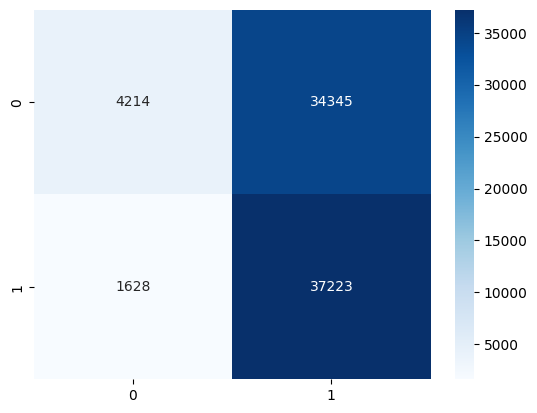

In [38]:
import seaborn as sns
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(log, X, y, cv=5)
sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap='Blues', fmt='g')